In [321]:
# Drop missing value rows using dropna() function
import pandas as pd
data = pd.read_csv('MedicalCentre.csv')
data.shape

(110527, 14)

In [322]:
data.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110524 non-null  float64
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 11.8+ MB


# 1. Prepare the data for downstream processes, e.g., deal with missing values, duplicates 	

## Missing values, duplicates 	

In [324]:
data.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               3
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [325]:
# deal with missing values
data=data.dropna()
data.shape

(110524, 14)

## Duplicates 	

In [326]:
##delete the duplicate rows with same appointmentID. 
data=data.drop_duplicates(subset='AppointmentID', keep='first')
data.shape

(110524, 14)

In [327]:
##drop the patientID and AppointmentID
data=data.drop(['PatientID','AppointmentID'],axis=1,inplace=False)
data.shape

(110524, 12)

# 2.Determine the frequency of distinct values in each feature set

In [328]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000
mean,37.088488,0.098268,0.197251,0.071867,0.030401,0.022249,0.321025
std,23.110271,0.297678,0.397925,0.258268,0.171688,0.161545,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110524 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Gender          110524 non-null  object 
 1   ScheduledDay    110524 non-null  object 
 2   AppointmentDay  110524 non-null  object 
 3   Age             110524 non-null  float64
 4   Neighbourhood   110524 non-null  object 
 5   Scholarship     110524 non-null  int64  
 6   Hypertension    110524 non-null  int64  
 7   Diabetes        110524 non-null  int64  
 8   Alcoholism      110524 non-null  int64  
 9   Handicap        110524 non-null  int64  
 10  SMS_received    110524 non-null  int64  
 11  No-show         110524 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 11.0+ MB


# 3. Initialize a function to plot relevant features within the dataset to visualize for outliers

/Users/liuyichen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

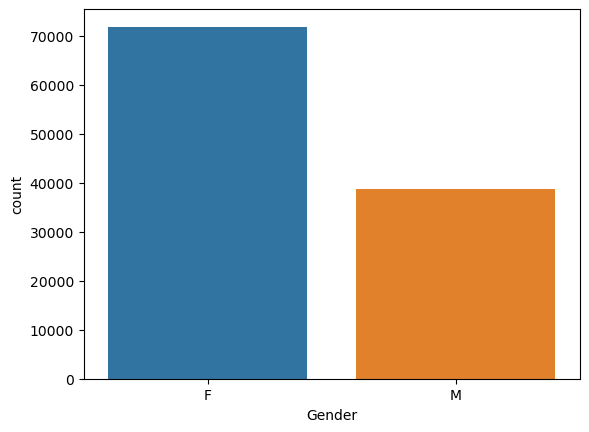

In [330]:
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
sns.countplot('Gender',data=data)

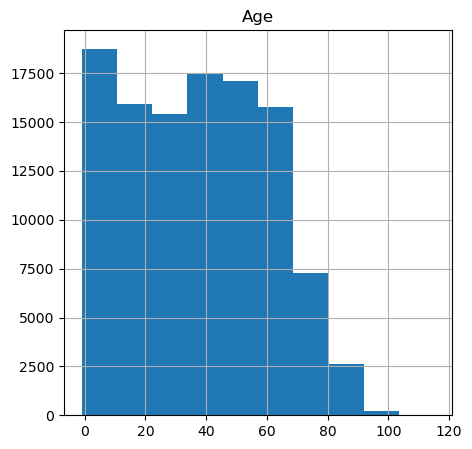

In [331]:
#histogram for each  feature
data.hist(column='Age',bins=10,figsize=(5,5))
plt.show()

<AxesSubplot:xlabel='Age'>

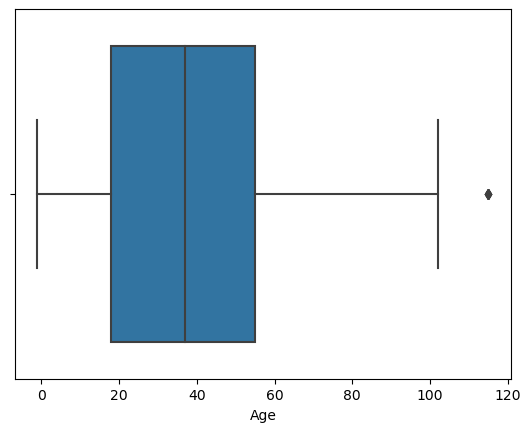

In [332]:
sns.boxplot(x='Age',data=data)
plt.subplot()

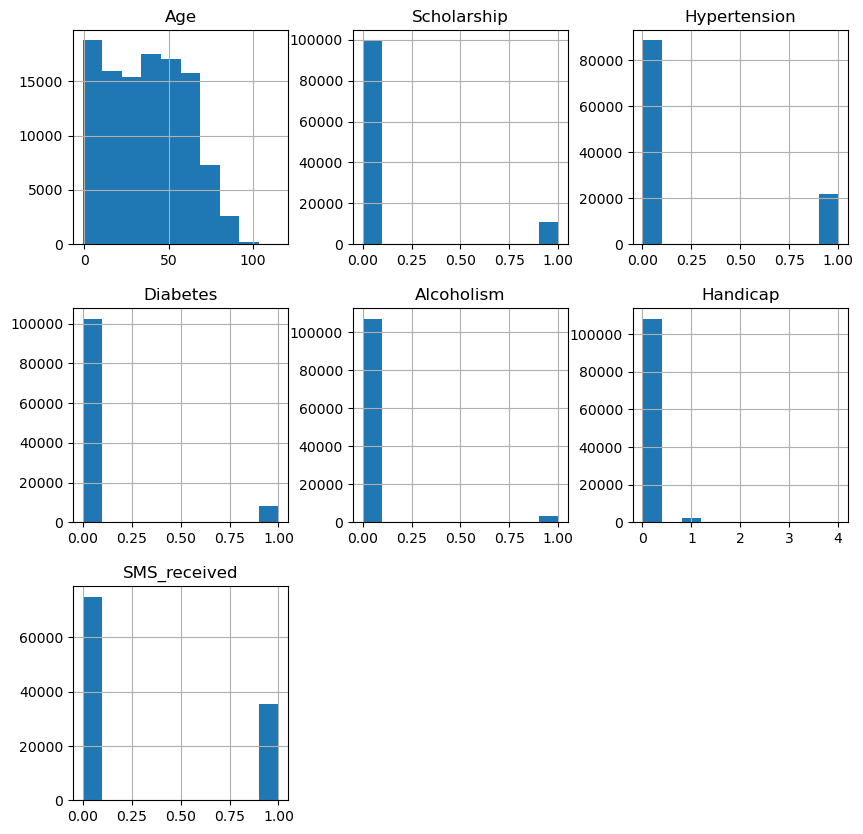

In [333]:
#histogram for each  feature
data.hist(bins=10,figsize=(10,10))
plt.show() 

# 4.  Count the frequency of negative Age feature observations, and remove them

In [334]:
data.Age.value_counts()

 0.0      3539
 1.0      2273
 52.0     1746
 49.0     1652
 53.0     1651
          ... 
 115.0       5
 100.0       4
 102.0       2
 99.0        1
-1.0         1
Name: Age, Length: 104, dtype: int64

In [349]:
## Filter age who under zero and delete. 
data[(data.Age <0)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AwaitingTime
99832,F,2016-06-06 08:58:13,2016-06-06,-1.0,ROMÃO,0,0,0,0,0,0,No,0 days 08:58:13


In [354]:
data=data.drop([99832],axis=0,inplace=False)

# 5.The values within AwaitingTime are negative, transform them into positive values

# 7.Separate the date features into date components

In [355]:
parse_dates=['ScheduledDay','AppointmentDay']

In [338]:
data.ScheduledDay=data.ScheduledDay.str.replace('T',' ')
data.ScheduledDay=data.ScheduledDay.str.replace('Z','')
data.ScheduledDay[0]

'2016-04-29 18:38:08'

In [339]:
data.AppointmentDay=data.AppointmentDay.str.replace('T',' ')
data.AppointmentDay=data.AppointmentDay.str.replace('Z','')
data.AppointmentDay[0]

'2016-04-29 00:00:00'

In [340]:
data.ScheduledDay=pd.to_datetime(data['ScheduledDay'], format='%Y-%m-%d %H:%M:%S')
data.AppointmentDay=pd.to_datetime(data['AppointmentDay'], format='%Y-%m-%d %H:%M:%S')
data.ScheduledDay[0]

Timestamp('2016-04-29 18:38:08')

In [341]:
data.ScheduledDay[42]-data.AppointmentDay[42]

Timedelta('-1 days +08:34:54')

In [351]:
data.dtypes

Gender                     object
ScheduledDay       datetime64[ns]
AppointmentDay     datetime64[ns]
Age                       float64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No-show                    object
AwaitingTime      timedelta64[ns]
dtype: object

In [352]:
data['AwaitingTime']=data['ScheduledDay']-data['AppointmentDay']

In [356]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,AwaitingTime
count,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523
mean,37.088832,0.098269,0.197253,0.071867,0.030401,0.022249,0.321028,-10 days +06:51:03.135845028
std,23.110091,0.297680,0.397927,0.258269,0.171689,0.161546,0.466874,15 days 05:51:44.221428012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179 days +10:40:59
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15 days +16:18:17.500000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4 days +12:37:12
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 08:18:28
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6 days 13:49:20


In [359]:
data['AwaitingTime'] < '%0-%0-%0 %0:%0:%0'

TypeError: Invalid comparison between dtype=timedelta64[ns] and str

# 6. ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code

In [250]:
data.dtypes

Gender                     object
ScheduledDay       datetime64[ns]
AppointmentDay     datetime64[ns]
Age                       float64
Neighbourhood              object
waiting_time      timedelta64[ns]
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No-show                    object
dtype: object

In [251]:
import numpy as np
data['Age'] = data['Age'].apply(np.int64)

In [252]:
data['Gender'].replace('F', 0,inplace=True)
data['Gender'].replace('M', 1,inplace=True)
data['Gender'] = data['Gender'].apply(np.int64)
data.dtypes

Gender                      int64
ScheduledDay       datetime64[ns]
AppointmentDay     datetime64[ns]
Age                         int64
Neighbourhood              object
waiting_time      timedelta64[ns]
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No-show                    object
dtype: object

In [253]:
data['No-show'].replace('No', 0,inplace=True)
data['No-show'].replace('Yes', 1,inplace=True)
data['No-show'] = data['No-show'].apply(np.int64)
data.dtypes

Gender                      int64
ScheduledDay       datetime64[ns]
AppointmentDay     datetime64[ns]
Age                         int64
Neighbourhood              object
waiting_time      timedelta64[ns]
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No-show                     int64
dtype: object

In [254]:
data.dtypes

Gender                      int64
ScheduledDay       datetime64[ns]
AppointmentDay     datetime64[ns]
Age                         int64
Neighbourhood              object
waiting_time      timedelta64[ns]
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No-show                     int64
dtype: object

# 8.ML algorithms work best when the input data are scaled to a narrow range around zero. Rescale the age feature with a normalizing (e.g., min_max normalization) or standardization (e.g., z_score standardization) function.

### (1)normalization ( min_max normalization)

In [260]:
data.Age=(data.Age-data.Age.min())/(data.Age.max()-data.Age.min())

### (2)standardization (e.g., z_score standardization)

In [258]:
# Z-Score using pandas
(data.Age - data.Age.mean()) / data.Age.std()

In [261]:
data.describe()

,Gender,Age,waiting_time,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,110524.000000,110524.000000,110524,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000
mean,0.350024,0.328349,-10 days +06:51:11.022185227,0.098268,0.197251,0.071867,0.030401,0.022249,0.321025,0.201938
std,0.476979,0.199226,15 days 05:51:40.872417405,0.297678,0.397925,0.258268,0.171688,0.161545,0.466873,0.401448
min,0.000000,0.000000,-179 days +10:40:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.163793,-15 days +16:18:18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.327586,-4 days +12:37:27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.482759,0 days 08:18:28.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,6 days 13:49:20,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


# 9 Conduct variability comparison between features using a correlation matrix & drop correlated features

In [257]:
corr_matrix = data.corr()
corr_matrix

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
Gender,1.000000,-0.106455,-0.114295,-0.055720,-0.032555,0.106169,0.022814,-0.046326,-0.004119
Age,-0.106455,1.000000,-0.092453,0.504602,0.292400,0.095815,0.078036,0.012629,-0.060311
Scholarship,-0.114295,-0.092453,1.000000,-0.019733,-0.024896,0.035021,-0.008588,0.001194,0.029131
Hypertension,-0.055720,0.504602,-0.019733,1.000000,0.433084,0.087969,0.080082,-0.006267,-0.035708
Diabetes,-0.032555,0.292400,-0.024896,0.433084,1.000000,0.018472,0.057529,-0.014550,-0.015184
Alcoholism,0.106169,0.095815,0.035021,0.087969,0.018472,1.000000,0.004647,-0.026148,-0.000198
Handicap,0.022814,0.078036,-0.008588,0.080082,0.057529,0.004647,1.000000,-0.024161,-0.006078
SMS_received,-0.046326,0.012629,0.001194,-0.006267,-0.014550,-0.026148,-0.024161,1.000000,0.126433
No-show,-0.004119,-0.060311,0.029131,-0.035708,-0.015184,-0.000198,-0.006078,0.126433,1.000000


# B. Model Development : Naïve Bayes classifier